# Chronos2 Usage Example

## Loading Chronos Model

In [1]:
import os 
import sys
import torch
import numpy as np

src_path = os.path.abspath(os.path.join("..", "src"))
if src_path not in sys.path:
    sys.path.insert(0, src_path)

from samay.model import Chronos_2_Model
from samay.dataset import Chronos_2_Dataset
# from tsfmproject.utils import load_args

# arg_path = "../config/timesfm.json"
# args = load_args(arg_path)
repo = "amazon/chronos-2"
chronos_model = Chronos_2_Model(repo=repo)


/nethome/sli999/anaconda3/envs/torch/lib/python3.11/site-packages/gluonts/json.py:102: UserWarning: Using `json`-module for json-handling. Consider installing one of `orjson`, `ujson` to speed up serialization and deserialization.
  warnings.warn(


Loading Chronos2 model from Huggingface repository


/nethome/sli999/anaconda3/envs/torch/lib/python3.11/site-packages/huggingface_hub/file_download.py:797: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


## Define the datasets

In [2]:
train_dataset = Chronos_2_Dataset(name="ett", datetime_col='date', path='../src/samay/models/moment/data/ETTh1.csv', 
                             mode='train', batch_size=16)
val_dataset = Chronos_2_Dataset(name="ett", datetime_col='date', path='../src/samay/models/moment/data/ETTh1.csv', 
                             mode='test', batch_size=16)

## Visualize the zero-shot forecasting

(462, 7, 512)


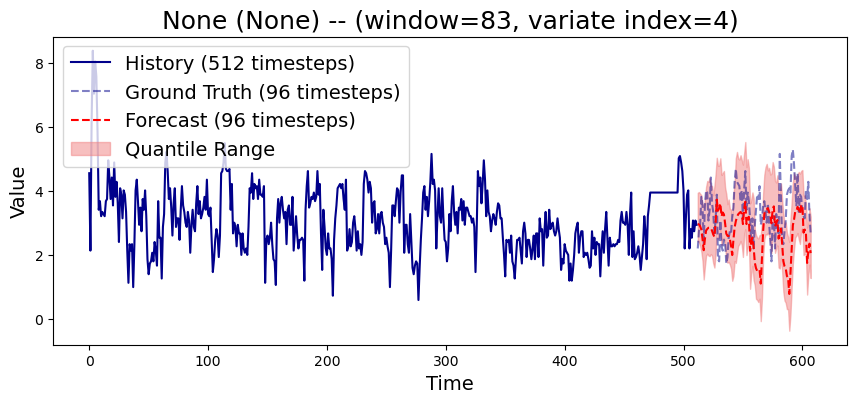

In [5]:
chronos_model.plot(val_dataset)

## Evaluate the zero-shot Chronos Model

In [3]:
metrics = chronos_model.evaluate(val_dataset, metric_only=True)
print(metrics)

{'mse': 10.759926848840049, 'mae': 1.6361710159183067, 'mase': 1.7127646683194964, 'mape': 1143.1514740290995, 'rmse': 3.280232743090046, 'nrmse': 0.07143518195734737, 'smape': 0.4104537000477991, 'msis': 0.05843291080260407, 'nd': 0.4395571699530995, 'mwsq': 1.5568297909419242, 'crps': 0.5540740964613039}


## Finetune Chronos Model on the ETT dataset

In [4]:
chronos_model.finetune(train_dataset)

Epoch 0, Loss: 6.730741322227972
Epoch 1, Loss: 4.97951876621999
Epoch 2, Loss: 3.891026048638113
Epoch 3, Loss: 3.291308584494264
Epoch 4, Loss: 3.042710910838255


## Evaluate the Finetuned Model

In [6]:
metrics = chronos_model.evaluate(val_dataset, metric_only=True)
print(metrics)

{'mse': 12.939704810504677, 'mae': 1.8563266848304445, 'mase': 1.9432264278632079, 'mape': 1638.4487551160817, 'rmse': 3.597180119274635, 'nrmse': 0.07833749507410549, 'smape': 0.4543924782191698, 'msis': 0.0664648646975304, 'nd': 0.4987019670645664, 'mwsq': 2.5509869881138334, 'crps': 0.7056915462290418}
